In [1]:
# explore_healthcare_vs_economy.ipynb

# Importing only the libraries we know how to use
import matplotlib.pyplot as plt

# Reading the data manually
file_path = '../data/worldbank_healthcare_data.csv'

# Let's read the file line by line
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Remove the header (first line)
header = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

# Check first 5 rows
for row in data[:5]:
    print(row)

['AFE', '2015', '1479.61525980543', '5.9713905922151', '61.713030523495', '49.010304526817', '607123269.0']
['AFE', '2016', '1329.80728479234', '6.06778640864792', '62.1679813169199', '47.7739196418728', '623369401.0']
['AFE', '2017', '1520.21223076132', '5.929017140206', '62.5912750961501', '46.7832639603647', '640058741.0']
['AFE', '2018', '1538.90167917284', '5.789154817055', '63.3306913582336', '43.8518142030077', '657801085.0']
['AFE', '2019', '1493.81793829992', '5.81267571889709', '63.8572612837042', '42.1900739123661', '675950189.0']


In [2]:
# Example: count how many rows have missing data
missing_rows = 0
for row in data:
    if '' in row:
        missing_rows += 1
print("Rows with missing data:", missing_rows)

# Example: extract GDP per capita (assuming it's in column 2)
gdp_values = []
for row in data:
    try:
        gdp = float(row[2])
        gdp_values.append(gdp)
    except:
        pass

# Compute the average manually
average_gdp = sum(gdp_values) / len(gdp_values)
print("Average GDP per capita:", average_gdp)

Rows with missing data: 1016
Average GDP per capita: 17579.61431089643


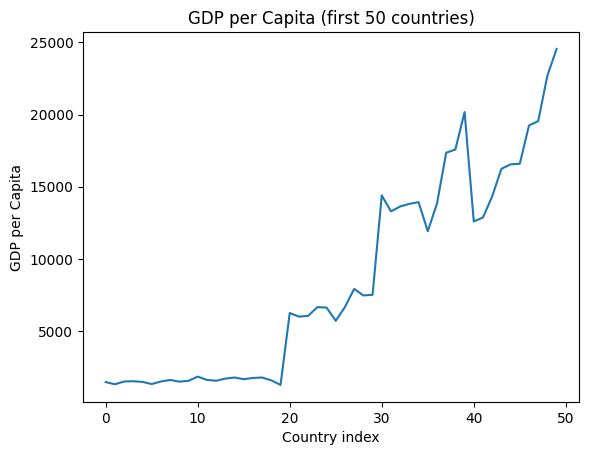

In [3]:
# Basic plot of GDP values
plt.plot(gdp_values[:50])  # first 50 countries
plt.title("GDP per Capita (first 50 countries)")
plt.xlabel("Country index")
plt.ylabel("GDP per Capita")
plt.show()